In [1]:
import os
os.chdir('/data/wjk/Workspace/Datasets/IGR')

import os.path as osp
import pandas as pd
pd.set_option('display.width', 500)    #设置整体宽度
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mtools import plot_cdf, plot_fig, load_json

df = pd.read_csv('Output/stat_df.csv')
exclude_phone = []
df=df[~df.isin(exclude_phone)]
df["err_h"]*=100
df["err_x"]*=100
df["err_y"]*=100
df["length"] = np.sqrt(df["gt_x"]**2 + df["gt_y"]**2)
pdf = df.rename(columns={'err_x':'Noise east (cm)','err_y':'Noise north (cm)', 'phone':'Device'})

route_type_dict = load_json(osp.join('plots', 'route_type_dict.json'))
train_type_dict = load_json(osp.join('plots', 'train_type_dict.json'))
pdf["Route type"] = pdf["trip"]
pdf["Train type"] = pdf["trip"]

for route in route_type_dict:
    pdf.loc[pdf.__getattr__("Route type") == route, ('Route type')] = route_type_dict[route]
for route in train_type_dict:
    pdf.loc[pdf.__getattr__("Train type") == route, ('Train type')] = train_type_dict[route]

print(df.groupby('phone').mean(numeric_only=True))

             err_x     err_y      err_h      gt_x      gt_y   length
phone                                                               
Mate30_2 -0.406684 -0.021006  39.451577 -0.010702 -0.004647  0.97084


In [2]:
df[["err_x","err_y","gt_x","gt_y"]].corr().to_csv('Output/corr.csv')
des = df.groupby('phone')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
# des.to_csv('Output/error_info.csv')

des = pdf.groupby('Route type')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
# des.to_csv('Output/error_info_bytype.csv')

des = df.groupby('phone')["length"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
# des.to_csv('Output/length_info.csv')

           count       mean        std       min        20%        25%        50%        75%        80%       90%         max
phone                                                                                                                        
Mate30_2  3909.0  39.451577  23.928702  0.408563  18.865062  21.597781  35.316729  52.613621  57.192332  71.34658  164.431254
             count       mean        std       min        20%        25%        50%        75%        80%        90%         max
Route type                                                                                                                      
04_19_10_53  489.0  32.989813  18.223364  1.464796  16.393956  18.423840  31.544716  44.013004  47.617469  55.863708  105.974100
04_19_11_02  489.0  40.656971  24.961446  0.636969  19.211325  22.208953  34.603655  53.622161  60.768553  73.312976  150.942430
04_19_11_12  489.0  35.883753  20.803154  1.479350  18.764120  21.145017  32.884552  46.521190  51.055833 

In [3]:
# pdf.columns
item_index = pdf.columns.to_list().index('Train type')
print(pdf.columns.to_list())

train_pdf = pdf.loc[pdf['Train type']=='test']
des = train_pdf.groupby('Device')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)

['Noise east (cm)', 'Noise north (cm)', 'err_h', 'gt_x', 'gt_y', 'Device', 'trip', 'length', 'Route type', 'Train type']
Empty DataFrame
Columns: [count, mean, std, min, 20%, 25%, 50%, 75%, 80%, 90%, max]
Index: []


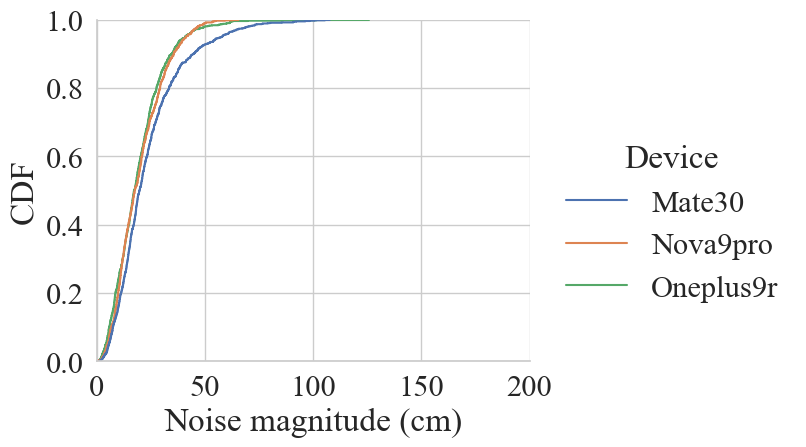

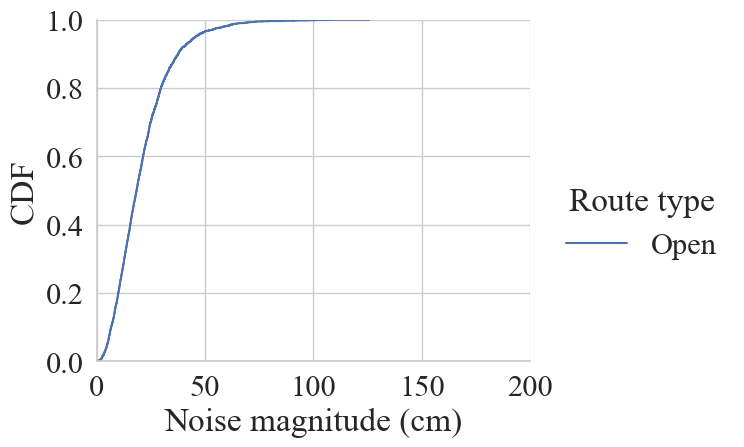

In [8]:
# g = plot_cdf(df, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], plot_params={'aspect':1.2})
# plt.show()
# g.savefig('Figures/err_h_cdf.png', dpi=150, pad_inches=0.2)

g = plot_cdf(pdf, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], fig_param={'font_scale':2.0}, plot_params={'aspect':1.2, 'hue':'Device'}) # 'col':'phone', 'col_wrap': 4
plt.show()
# g.savefig('Figures/err_h_cdf_byphone.png', dpi=150, pad_inches=0.2)

g = plot_cdf(pdf, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], fig_param={'font_scale':2.0}, plot_params={'aspect':1.2, 'hue':'Route type'}) # 'col':'phone', 'col_wrap': 4
plt.show()
# g.savefig('Figures/err_h_cdf_bytype.png', dpi=150, pad_inches=0.2)

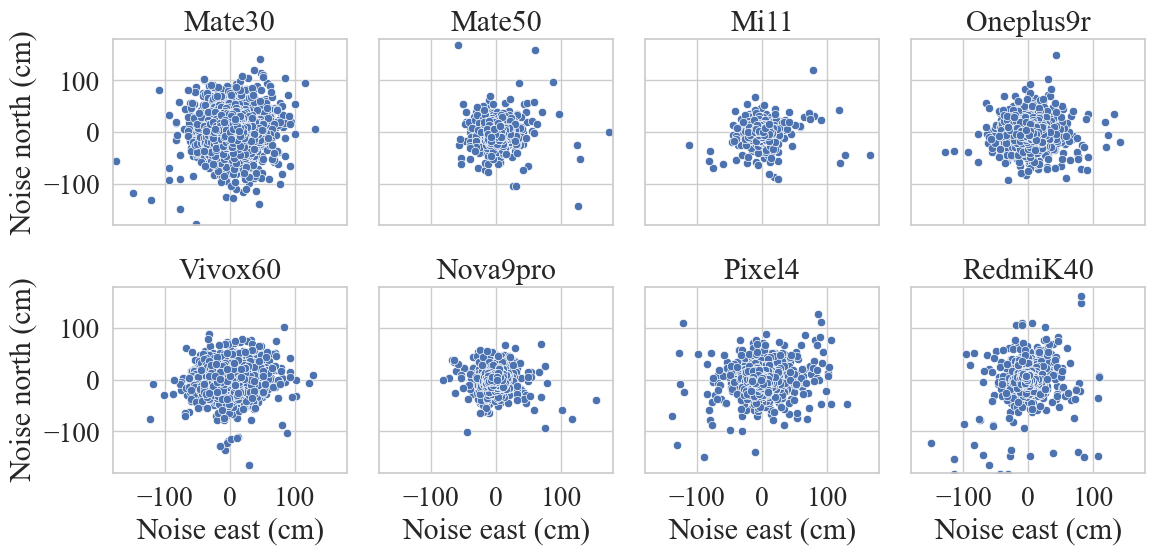

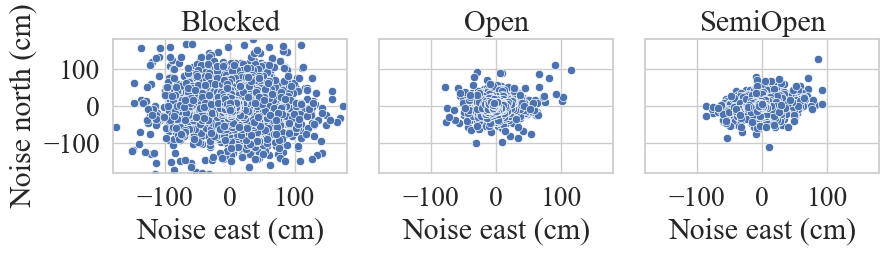

In [15]:
sns.set(**{'style':'whitegrid', 'font_scale':1.8, 'font':'Times New Roman'})
g = sns.FacetGrid(pdf, col="Device",  col_wrap=4, xlim=[-180, 180], ylim=[-180, 180], despine=False)
g.map(sns.scatterplot, "Noise east (cm)", "Noise north (cm)")
g.set_titles("{col_name}")

plt.show()
# g.savefig('Figures/err_scatter_byphone.png', dpi=150, pad_inches=0.2)

sns.set(**{'style':'whitegrid', 'font_scale':1.8, 'font':'Times New Roman'})
g = sns.FacetGrid(pdf, col="Route type",  col_wrap=4, xlim=[-180, 180], ylim=[-180, 180], despine=False)
g.map(sns.scatterplot, "Noise east (cm)", "Noise north (cm)")
g.set_titles("{col_name}")
plt.show()
# g.savefig('Figures/err_scatter_bytype.png', dpi=150, pad_inches=0.2)

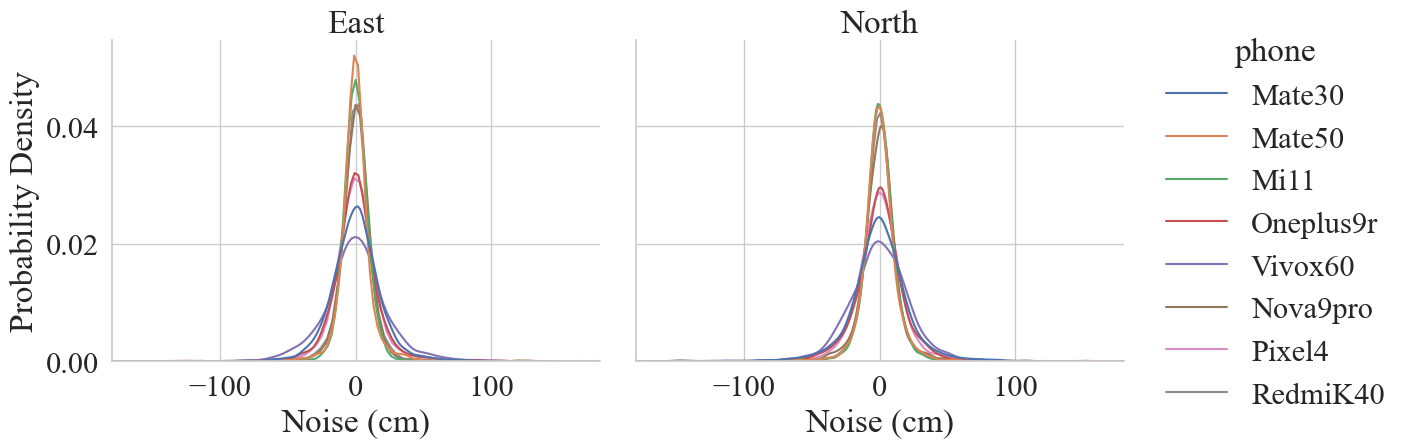

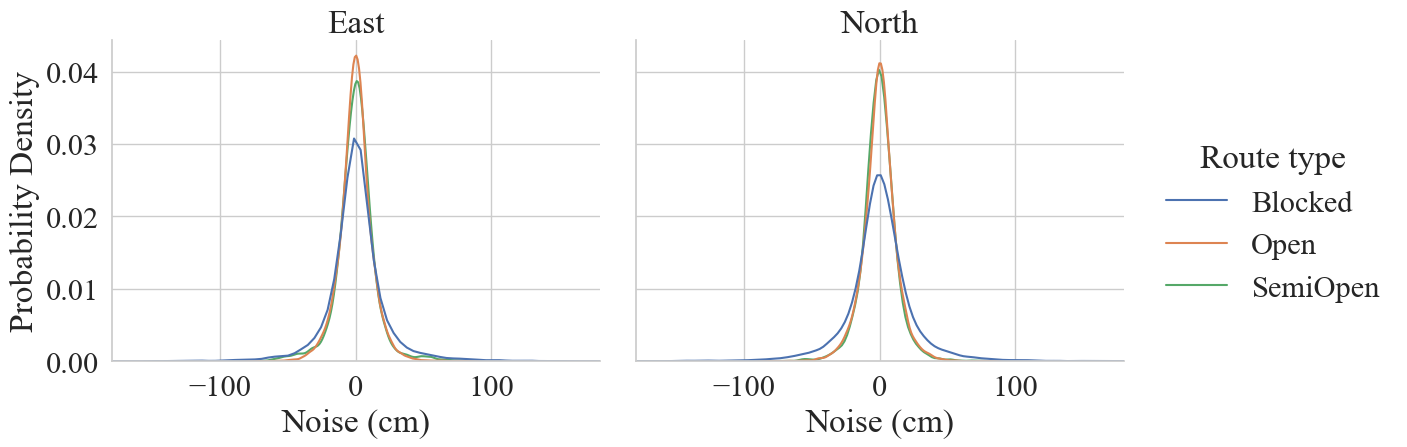

In [16]:
import numpy as np
new_df = pd.DataFrame({
    'err': np.hstack((df['err_x'].values, df['err_y'].values)),
    'phone': np.hstack((df['phone'].values, df['phone'].values)),
    'type': ['East']*len(pdf) + ['North']*len(pdf)
})
g = plot_fig(sns.displot, new_df, xlim=[-180, 180], xlabel='Noise (cm)', ylabel='Probability Density', fig_param={'font_scale':2.0}, plot_params={'x':'err', 'kind':'kde', 'aspect':1.2, 'hue':'phone', 'common_norm':False, 'col': 'type'}) # 
g.set_titles("{col_name}")
plt.show()
# g.savefig('Figures/err_dist_byphone.png', dpi=150, pad_inches=0.2)

new_df = pd.DataFrame({
    'err': np.hstack((df['err_x'].values, df['err_y'].values)),
    'Route type': np.hstack((pdf['Route type'].values, pdf['Route type'].values)),
    'type': ['East']*len(pdf) + ['North']*len(pdf)
})
g = plot_fig(sns.displot, new_df, xlim=[-180, 180], xlabel='Noise (cm)', ylabel='Probability Density', fig_param={'font_scale':2.0}, plot_params={'x':'err', 'kind':'kde', 'aspect':1.2, 'hue':'Route type', 'common_norm':False, 'col': 'type'}) # 
g.set_titles("{col_name}")
plt.show()
# g.savefig('Figures/err_dist_bytype.png', dpi=150, pad_inches=0.2)